In [4]:
import pandas as pd
import numpy as np
from scipy.stats import *

1. 그래프 그릴때 일부 날짜만 표시하기

In [5]:
df=pd.read_csv('./data/AB테스트/일별현황데이터.csv',encoding='cp949')

In [11]:
df.head()

,구매자수,방문자수,일자,총 판매 금액
0,328,1498,2019-01-01,6454056
1,301,1514,2019-01-02,5941439
2,219,1409,2019-01-03,3967404
3,276,1617,2019-01-04,5073708
4,311,1482,2019-01-05,6482795


In [7]:
len(set(df.일자))

365

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (20, 5)


In [17]:
# x축에 모든날짜가 ticks로 표식 - 구분이 어려움
xtick_range=np.cumsum([0,31,28,31,30,31,30,31,31,31,30,31,30])
xtick_label=df['일자'].loc[xtick_range]

KeyError: '[365] not in index'

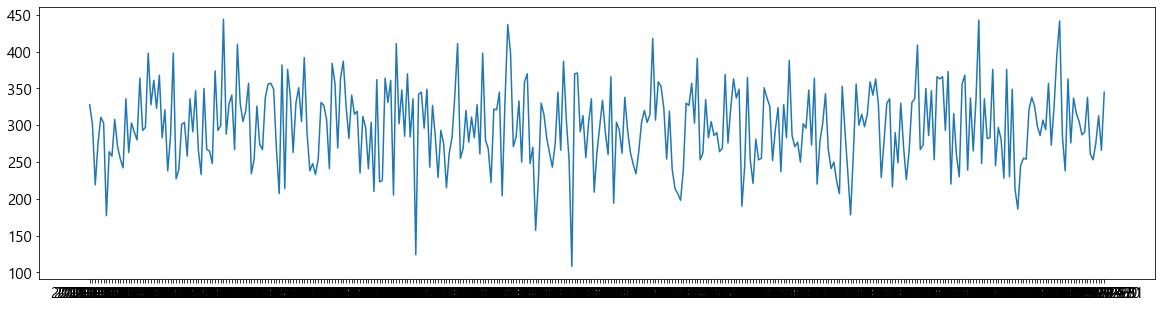

In [12]:
# 2019년 일별 구매자수 현황
plt.plot(df['일자'],df['구매자수'])

In [24]:
placement_A=pd.read_csv('./data/AB테스트/상품배치_A.csv',encoding='cp949'
                        ,index_col='고객ID')
placement_A.head()

,구매금액
고객ID,
C-1,20459
C-2,0
C-3,19726
C-4,0
C-5,19049


In [29]:
placement_B=pd.read_csv('./data/AB테스트/상품배치_B.csv',encoding='cp949'
                        ,index_col='고객ID')
placement_B.head()

,구매금액
고객ID,
C-200,0
C-201,0
C-202,0
C-203,19055
C-204,0


In [28]:
placement_C=pd.read_csv('./data/AB테스트/상품배치_C.csv',encoding='cp949'
                        ,index_col='고객ID')
placement_C.head()

,구매금액
고객ID,
C-360,0
C-361,19844
C-362,19085
C-363,0
C-364,19671


In [30]:
placement_A.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, C-1 to C-198
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   구매금액    198 non-null    int64
dtypes: int64(1)
memory usage: 3.1+ KB


In [31]:
placement_B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, C-200 to C-359
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   구매금액    160 non-null    int64
dtypes: int64(1)
memory usage: 2.5+ KB


In [32]:
placement_C.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, C-360 to C-507
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   구매금액    148 non-null    int64
dtypes: int64(1)
memory usage: 2.3+ KB


In [49]:
zero_A=placement_A.loc[placement_A['구매금액']!=0]['구매금액'].values
zero_B=placement_B.loc[placement_B['구매금액']!=0]['구매금액'].values
zero_C=placement_C.loc[placement_C['구매금액']!=0]['구매금액'].values

세개의 그룹이므로 그룹간 차이 확인은 ANOVA 검정 일원분산분석으로 진행

In [50]:
# 정규성 검정
print(shapiro(zero_A))
print(shapiro(zero_B))
print(shapiro(zero_C))

ShapiroResult(statistic=0.9873660802841187, pvalue=0.4481019377708435)
ShapiroResult(statistic=0.988836944103241, pvalue=0.8066813945770264)
ShapiroResult(statistic=0.9611336588859558, pvalue=0.05686437711119652)


In [51]:
# 등분산 검정 - 등분산성 만족
levene(zero_A,zero_B,zero_C)

LeveneResult(statistic=0.012659999227426385, pvalue=0.9874205016592401)

In [52]:
# 일원분산분석 : p-value가 거의 0
# -> 집단 A,B,C의 평균은 유의한 차이가 존재
f_oneway(zero_A,zero_B,zero_C)

F_onewayResult(statistic=76.88192392994758, pvalue=3.382319770772329e-26)

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
## 일원 분산분석의 결과가 유의한 차이 - 사후분석 진행

In [55]:
g_label=['A']*len(zero_A)+['B']*len(zero_B)+['C']*len(zero_C)

In [57]:
g_data=zero_A.tolist()+zero_B.tolist()+zero_C.tolist()
len(g_label),len(g_data)

(229, 229)

In [58]:
print(pairwise_tukeyhsd(g_data,g_label))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     A      B -1883.1765   -0.0 -2276.2519 -1490.101   True
     A      C    66.7946 0.9221  -343.8753  477.4645  False
     B      C  1949.9711   -0.0  1503.2593 2396.6829   True
-----------------------------------------------------------


구매금액을 0원 포함해서 분석

In [63]:
print(shapiro(placement_A['구매금액']))
print(shapiro(placement_B['구매금액']))
print(shapiro(placement_C['구매금액']))

ShapiroResult(statistic=0.682793378829956, pvalue=4.386357325621827e-19)
ShapiroResult(statistic=0.6676486730575562, pvalue=1.5833057487432602e-17)
ShapiroResult(statistic=0.6531034708023071, pvalue=3.3714733640971184e-17)


In [65]:
# 등분산성 검정 -
levene(placement_A['구매금액'],placement_B['구매금액'],placement_C['구매금액'])

LeveneResult(statistic=2.8293955607060832, pvalue=0.05998873624115593)

- 비모수적방법
    - 관측 값이 어느 특정한 확률분포를 따른다고 전제할 수 없거나 또는 모집단에 대한 아무런 정보가 없는 경우에 실시하는 검정방법으로 모수에 대한 언급 이 없으며 분포무관 방법이라고도 한다.


In [68]:
# 정규성을 만족하지 않으므로 비모수적방법인 Kruskal_wallis test진행
# p-value가 0.05보다 낮으므로 세 집단간에는 유의한 차이가 존재
kruskal(placement_A['구매금액'],placement_B['구매금액'],placement_C['구매금액'])

KruskalResult(statistic=19.713898300439208, pvalue=5.238191550170163e-05)

In [72]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(placement_A) + ['B'] * len(placement_B) + ['C'] * len(placement_C)
Data = placement_A['구매금액'].tolist() + placement_B['구매금액'].tolist() + placement_C['구매금액'].tolist()

print(pairwise_tukeyhsd(Data, Group))

# A ~ (B,C) 관계임을 어느정도 예샹 - 그룹을 묶기가 힘들다
# A와 B는 차이가 있음
# A와 B는 차이가 없음
# A와 C는 차이가 없음


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     A      B -2602.2773 0.0314 -5020.3131 -184.2414   True
     A      C -2302.0043  0.074 -4773.6625  169.6539  False
     B      C    300.273   0.96 -2293.8963 2894.4423  False
-----------------------------------------------------------


### 구매여부와 상품배치 간 관계 파악

In [75]:
placement_A['상품배치']='A'
placement_A
placement_B['상품배치']='B'
placement_B
placement_C['상품배치']='C'
placement_C

,구매금액,상품배치
고객ID,,
C-360,0,C
C-361,19844,C
C-362,19085,C
C-363,0,C
C-364,19671,C
...,...,...
C-503,0,C
C-504,0,C
C-505,0,C


In [79]:
placement=pd.concat([placement_A,placement_B,placement_C],axis=0,ignore_index=False)
placement.head()
placement.tail()

,구매금액,상품배치
고객ID,,
C-503,0,C
C-504,0,C
C-505,0,C
C-506,21363,C
C-507,0,C


In [82]:
# 구매여부 컬럼 추가
placement['구매여부']=(placement['구매금액']!=0).astype(int)

In [83]:
placement.head()

,구매금액,상품배치,구매여부
고객ID,,,
C-1,20459,A,1
C-2,0,A,0
C-3,19726,A,1
C-4,0,A,0
C-5,19049,A,1


### 상품배치와 구매여부간의 관계
- 범주형 변수이므로 두 변수간의 독립성 검정 - 카이제곱
- 귀무가설 : 두 변수는 독립적이다
- 대립가설 : 두 변수는 종속적이다

In [85]:
# 교차테이블 생성
cross_table=pd.crosstab(placement['상품배치'],placement['구매여부'])
cross_table

구매여부,0,1
상품배치,,
A,96,102
B,92,68
C,89,59


In [87]:
obs=cross_table.values
stat,p,dof,exp=chi2_contingency(obs,correction=False)

In [ ]:
p
# p-value가 0.06으로 구매여부와 상품배치는 유의한 차이가 있다고보기 어렵다
# 상품 B와 C의 차이가 크지않아서 유의미한 관계가 없다고 나왔을 가능성이 크다

In [88]:
# 기대값
pd.DataFrame(exp,columns=cross_table.columns,index=cross_table.index)

구매여부,0,1
상품배치,,
A,108.391304,89.608696
B,87.588933,72.411067
C,81.019763,66.980237


In [90]:
sitemap_A=pd.read_csv('./data/AB테스트/사이트맵_A.csv',encoding='cp949')
sitemap_B=pd.read_csv('./data/AB테스트/사이트맵_B.csv',encoding='cp949')
sitemap_C=pd.read_csv('./data/AB테스트/사이트맵_C.csv',encoding='cp949')

In [91]:
A_time=sitemap_A['체류시간(분)'].values
B_time=sitemap_B['체류시간(분)'].values
C_time=sitemap_C['체류시간(분)'].values

In [100]:
A_mean=A_time.mean()
B_mean=B_time.mean()
C_mean=C_time.mean()
print('사이트맵A 체류시간 평균 {}\n사이트맵B 체류시간 평균 {}\n사이트맵C 체류시간 평균 {}'.format(A_mean,B_mean,C_mean))

사이트맵A 체류시간 평균 9.404255319148936
사이트맵B 체류시간 평균 9.830645161290322
사이트맵C 체류시간 평균 9.514285714285714


{'whiskers': [<matplotlib.lines.Line2D at 0x20d05d71fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x20d05d7a580>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d05d71cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x20d05d7ab20>,
 'fliers': [<matplotlib.lines.Line2D at 0x20d05d7adf0>,
 'means': []}

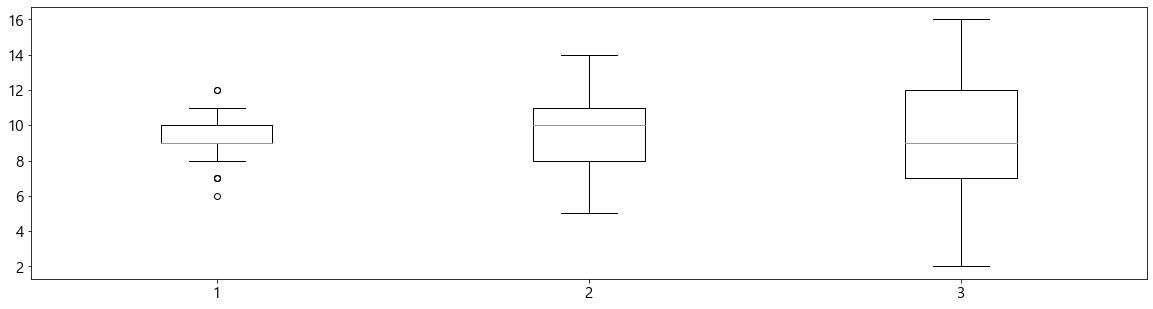

In [104]:
plt.boxplot([A_time,B_time,C_time])


In [105]:
# 모든 데이터가 정규성을 만족하지는 않는다 - 비모수적 방법
print(shapiro(A_time))
print(shapiro(B_time))
print(shapiro(C_time))

ShapiroResult(statistic=0.9157226085662842, pvalue=6.613624314866229e-09)
ShapiroResult(statistic=0.9712396860122681, pvalue=0.009464900940656662)
ShapiroResult(statistic=0.9803875684738159, pvalue=0.12245512008666992)


In [107]:
levene(A_time,B_time,C_time)
# 등분산성 만족하지 않음

LeveneResult(statistic=60.293391878247746, pvalue=1.0454410123159872e-23)

In [108]:
print(kruskal(A_time,B_time,C_time))
# 세 집단 간 유의미한 차이가 존재하지 않는다

KruskalResult(statistic=3.9357302803694645, pvalue=0.13975489507574576)


In [ ]:
sitemap_A = pd.read_csv("./data/AB테스트/사이트맵_A.csv",encoding='cp949')
sitemap_A.head()

sitemap_B = pd.read_csv("./data/AB테스트/사이트맵_B.csv",encoding='cp949')
sitemap_B.head()

sitemap_C = pd.read_csv("./data/AB테스트/사이트맵_C.csv",encoding='cp949')
sitemap_C.head()


할인 쿠폰의 효과 분석 - 대응표본 T 검정(쌍체표본 T 검정)

In [109]:
df = pd.read_csv("./data/AB테스트/할인쿠폰발행효과.csv", encoding='cp949')
df.head()


,고객ID,발행전 구매 횟수,발행후 구매 횟수
0,C-925,3,1
1,C-926,0,0
2,C-927,0,3
3,C-928,0,4
4,C-929,4,4


Text(0, 0.5, '구매 횟수')

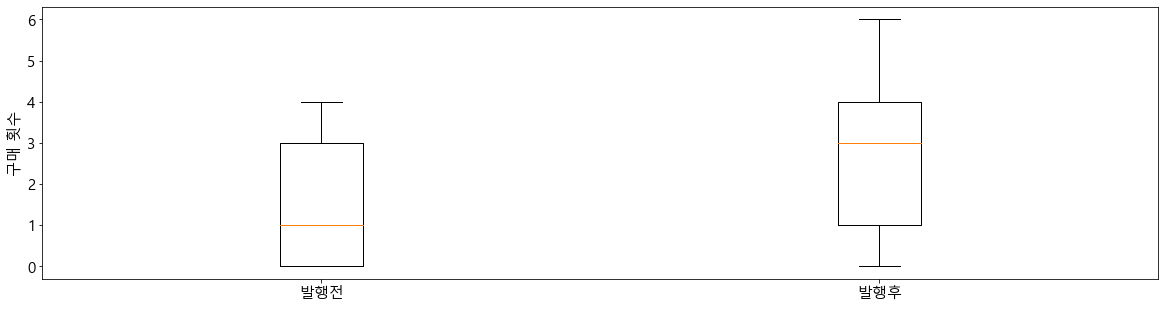

In [110]:
plt.boxplot([df['발행전 구매 횟수'], df['발행후 구매 횟수']])
plt.xticks([1, 2], ['발행전', '발행후'])
plt.ylabel("구매 횟수")


In [111]:
# 정규성 검정 - 정규성만족X
shapiro(df['발행후 구매 횟수']-df['발행전 구매 횟수'])

ShapiroResult(statistic=0.962637186050415, pvalue=0.00035276805283501744)

In [113]:
# 정규성이 없으므로 비모수적인 방법 - wilcoxon 검정 수행
# p-value 0.05이하 - 귀무가설 기각
wilcoxon(df['발행후 구매 횟수'],df['발행전 구매 횟수'])

WilcoxonResult(statistic=1382.0, pvalue=6.449740420318467e-10)

### 체류시간과 구매금액 간 관계 분석 - 상관분석

In [116]:
df = pd.read_csv("./data/AB테스트/체류시간_구매금액.csv", encoding='cp949')
df.head()


,고객ID,구매금액,체류시간
0,C-1079,78625,9
1,C-1080,0,9
2,C-1081,105173,12
3,C-1082,0,14
4,C-1083,0,10


<AxesSubplot:xlabel='체류시간', ylabel='구매금액'>

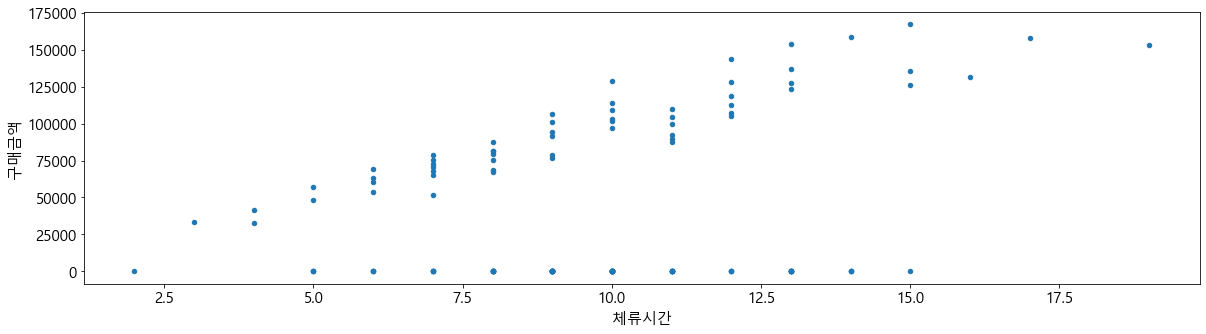

In [117]:
df.plot(kind='scatter',x='체류시간',y='구매금액')

In [118]:
df.corr(method='pearson')

,구매금액,체류시간
구매금액,1.000000,0.320852
체류시간,0.320852,1.000000


In [119]:
df_without_zero=df.loc[df['구매금액']!=0]

In [120]:
df_without_zero.corr(method='pearson')

,구매금액,체류시간
구매금액,1.000000,0.924526
체류시간,0.924526,1.000000


In [122]:
df = pd.read_excel("./data/AB테스트/구매여부_버튼타입_통계.xlsx")
df.head()
# 구매버튼의 디자인을 A,B,C type 

,구매여부,버튼타입,고객 수
0,구매,A,9
1,NaN,B,9
2,NaN,C,15
3,비구매,A,93
4,NaN,B,85


In [126]:
df.fillna(method='ffill',inplace=True)

In [127]:
cross_table=pd.pivot_table(df,index='구매여부',columns='버튼타입',
                          values='고객 수')

In [128]:
cross_table

버튼타입,A,B,C
구매여부,,,
구매,9,9,15
비구매,93,85,89


In [129]:
obs = cross_table.values
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue) # pvalue가 0.38로 구매여부와 버튼타입 간에는 관계가 없음을 확인


0.38033325575735993
